In [1]:
pkg load statistics
set(0,'defaultAxesFontSize',20)
set(0,'defaultLineLineWidth',5)

# Intro statistics

Most of the models you have covered in your chemical engineering classes are focused on deterministic models:
- Definition: Mathematical model in which outcomes are precisely determined through known relationships among states and events, without any room for random variation. In such models, a given input will always produce the same output, such as in a known chemical reaction. 

However real life is often not deterministic, due to factors outside of our control:
- We have a deterministic model, but we aren't sure about the values of our parameters
- The model itself might be stochastic (random), such as chemical kinetics at very small concentrations
- We may be modeling a process with an assumed model, but that model may be wrong or one of a variety of possible models

Some of the most common questions we face as chemical engineers:
- Given a model with parameters, and some uncertainty in those values, what is the likelihood of various outcomes (getting conversion about 90%, making X dollars in profit, etc)
- Given a model and experimental data, does the model explain the data?
- Given a model with unknown parameters and experimental data, what are the likely values of those parameters?

# Simple distributions

## Discrete distributions

Discrete distributions describe the probability of one of a number of discrete events happening. 



###  Example 1: flipping a coin
- P(heads) = 1/2
- P(tails) = 1/2

There are only two possibilities - heads or tails. We call P(x) 'the probability of x' for a single event. In this case, we have assumed that we know the probabilty of those two events. 

In [151]:
# Simple coin flip analysis

function result = coin_flip()

    # Sample from a uniform distribution
    random_uniform_sample = rand();
    
    if random_uniform_sample>0.5
        result=1;
    else
        result=0;
    end
end

coin_flip()
coin_flip()

ans = 0
ans = 0


Being able to sample from a distribution is not very satisfying. We often want to plot these. I'm sure you've all seen histograms before. 

In [142]:
res

res =

 Columns 1 through 20:

   4   4   6   6   5   6   5   5   5   2   3   2   3   6   1   5   2   1   5   3

 Columns 21 through 40:

   4   4   3   4   2   3   2   2   3   4   3   4   2   3   4   6   3   1   4   1

 Columns 41 through 51:

   1   5   3   5   2   6   1   5   3   1   5



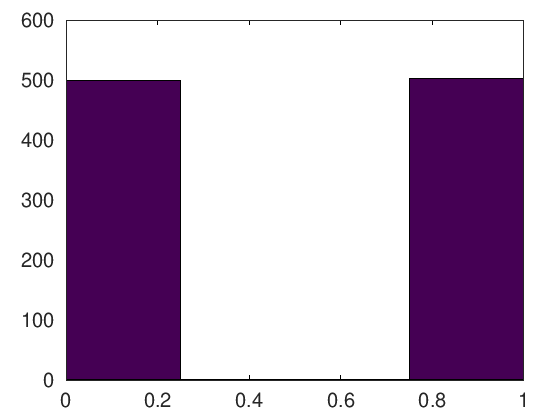

In [155]:
res = arrayfun(@coin_flip, 0:1000);

hist(res,4)

Notice that this histogram is stochastic - every time you run it you get a different result. We'll come back to this.

### Example 2: Weighted dice

Let's say we have a 6-sided die , where the 6 has a 20% chance of being rolled, and the 1-5 have equal chances otherwise(80/6=16% each)

In [157]:
rand()

ans =  0.52672


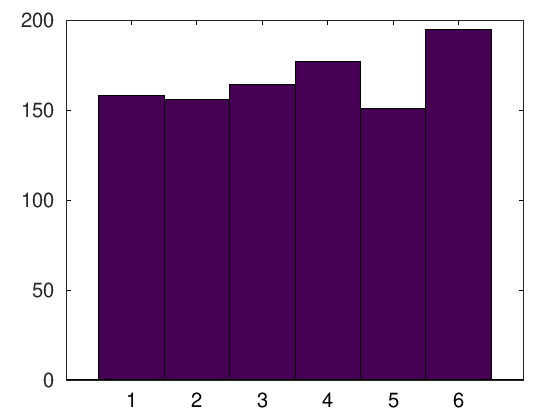

In [171]:
# Simple coin flip analysis

function result = roll_dice()

    # Sample from a uniform distribution
    random_uniform_sample = rand()*100;

    if random_uniform_sample<16
        result=1;
    elseif random_uniform_sample<32
        result=2;
    elseif random_uniform_sample<48
        result=3;
    elseif random_uniform_sample<64
        result=4;
    elseif random_uniform_sample<80
        result=5;
    else 
        result=6;
    end
end

res = arrayfun(@roll_dice, 0:1000);

hist(res,[1,2,3,4,5,6])

This histogram is also stochastic but has more discrete possibilities.

## Continuous Distribution

Many of the variables we are interested in can take on any value in a continuous range. For example temperature can be 273.15 or 278.0 or 273.16, or 273.1666. We can't say the probability that the temperature will be exactly 273.000000000000000(infinite zeros) K. Instead, what we can say is the probability that it will be in a range. We define the probability distribution function (PDF) $f(x)$
$$P[a\leq X\leq b] = \int_a^b f(x) dx$$
We can also define the cumulative distribution function:
$$ F_X(x) = P(X<x)=\int_{-\infty}^xf_X(t)dt$$

### Gaussian distribution

The most common continuous distribution is the Gaussian distribution function, where $f(x)$ is 

$$f(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$$

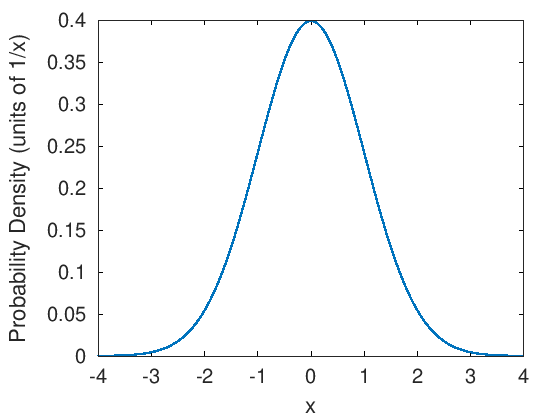

In [172]:
#Plot the gaussian distribution function

x = linspace(-4,4);
f = 1/sqrt(2*pi)*exp(-x.^2/2);
plot(x,f)
xlabel('x')
ylabel('Probability Density (units of 1/x)')

Note that this doesn't say anything about the mean (0) and standard deviation (1). We can get that by modifying this with an offset and standard deviation:
$$ f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2}$$
where $\mu$ is the mean and $\sigma$ is the standard deviation.

Let's say we measure the temperature outdoors several times and report 10 C +/- 2C. We can plot the implied distribution for that too.

mu =  10
sigma =  2


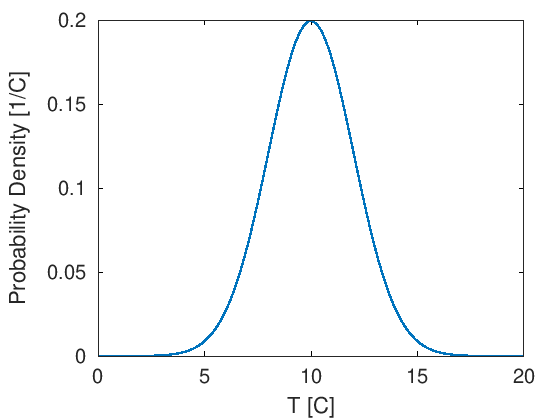

In [173]:
#Plot the gaussian distribution function

x = linspace(-0,20);
mu=10
sigma=2
f = 1/sqrt(2*pi*sigma^2)*exp(-(x-mu).^2/2/sigma^2);
plot(x,f)
xlabel('T [C]')
ylabel('Probability Density [1/C]')

This implies that if we were to go out and measure the temperature more times, then plot a histogram, we would get something that look this. This also says that the probability of the temperature being in between 10 and 11 C is:
$$P[10<T<11]=\int_{10}^{11}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx$$. 

In [7]:
function  f = temperature(T)
    mu=10;
    sigma=2;
    f = 1/sqrt(2*pi*sigma^2)*exp(-(T-mu).^2/2/sigma^2); 
end

integral(@temperature,10,11)

ans =  0.19146


This question is so common that we can use the cumulative distribution function, which is known for a gaussian:
$$P[10<T<11]=\int_{10}^{11}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx=\int_{-\infty}^{11}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx\\
-\int_{-\infty}^{10}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx$$ This results in a special function (the error function):
$$F(x)=\frac{1}{2}\left[1+\text{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$

(sketch the error function)

In [175]:
function cdf = temperatureCDF(T)
    mu=10;
    sigma=2;
    cdf = 1/2*(1+erf((T-mu)/sigma/sqrt(2)));
end

temperatureCDF(11)
temperatureCDF(10)

temperatureCDF(11)-temperatureCDF(10)

ans =  0.69146
ans =  0.50000
ans =  0.19146


This result is basically identical to the direct integration

# Sampling from an arbitrary distribution

Say we know exactly what the probability density function of a process is. Drawing samples from that distribution (the continuous equivalent of rolling the dice multiple times) can be very difficult. There are several likely scenarios:
- You might know how to sample from the distribution if it is very simple
- You can see if methods already exist in matlab or other packages to sample from the distribution  (say https://www.mathworks.com/help/stats/probability-distributions-1.html) 
- (harder) you can use methods such as Monte Carlo methods to numerically generate samples from an arbitrary PDF. 

We will assume that you can sample from a distribution in matlab for this week. 

In [176]:
rand()

ans =  0.35162


In [183]:
# Example for normal distribution
normrnd(-1,1.0)

ans =  0.033700


# Plotting distributions

I am sure you all are aware of how to make histograms. In matlab it is quite easy with the `hist` or `histogram` functions. This is very straightforward. 

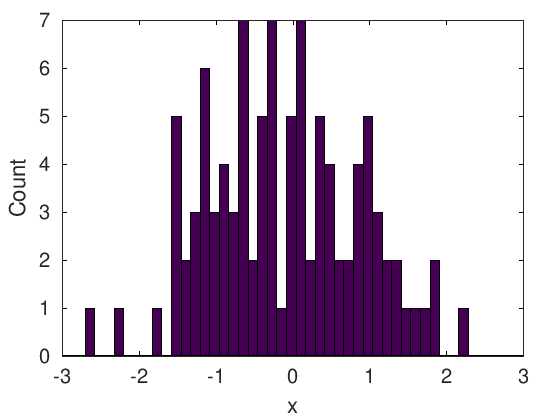

In [186]:
# Generate a bunch of random numbers
random_samples = normrnd(0,1.0,100,1);
hist(random_samples,40)
xlabel('x')
ylabel('Count')

This count is not very helpful, as we can't really compare it to the probability distribution function from before. Most importantly, it's not normalized, but it also depends on the bin size. For example:

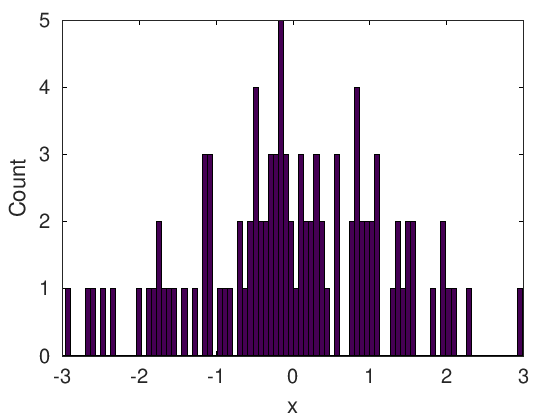

In [11]:
hist(random_samples,90)
xlabel('x')
ylabel('Count')

What we are often more interested in is an estimate of the probability distribution function with some assumption on how smooth the curve is. For example:

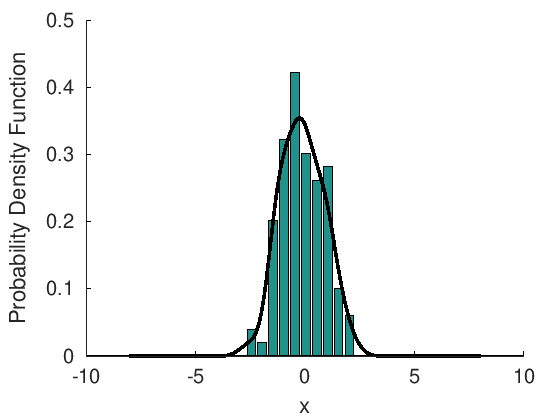

In [191]:
pkg load econometrics
eval_range = reshape(linspace(-8,8,1000),[1000;1]);
density = kernel_density(eval_range,random_samples,0.4);

hold all;
[nn,xx] = hist(random_samples,10);
hold all
bar(xx,nn/sum(nn)/(xx(2)-xx(1)))

plot(eval_range,density,'k','LineWidth',10)
xlabel('x')
ylabel('Probability Density Function')

# Central limit theorem

We tend to focus on Gaussian distributions because of a phenomenon known as the central limit theorem. Essentially, if you have a large number of independent, identically distributed values (imagine the coin toss or dice roll), the sum of those numbers or the expectation of the samples will converge to a Gaussian distribution.

For example, let's consider a number of coin tosses and we're interested in the average number of heads that we will get out of X tosses (X could be 1, 10, 100, etc). 

In [204]:
# Simple coin flip analysis
function result = coin_flip()

    # Sample from a uniform distribution
    random_uniform_sample = rand();
    
    if random_uniform_sample>0.5
        result=1;
    else
        result=0;
    end
end

function total = fraction_heads(num_flips)
    flips = arrayfun(@coin_flip, 1:num_flips);
    total = sum(flips)/num_flips;
end

fraction_heads(100)

ans =  0.54000


I can repeat this process over and over and see how this total number varies.

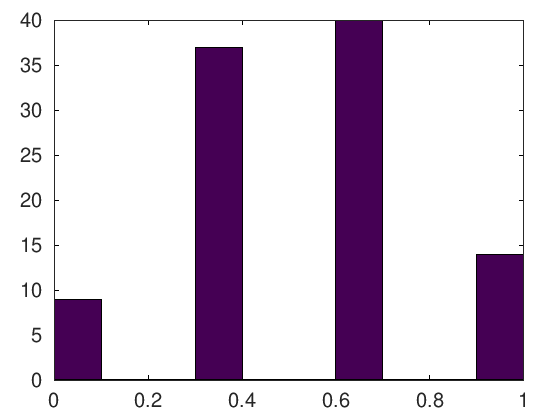

In [205]:
flip_results=[];
for i=1:100
    flip_results(i) = fraction_heads(3);
end

hist(flip_results);

This is for 5 independent variables (5 independent coin tosses). The central limit theorem only holds for an infinite number of coin tosses, so it's accuracy will improve with number of independent coin tosses. 

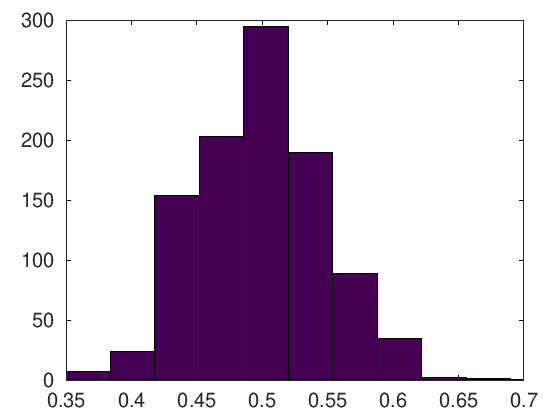

In [209]:
flip_results=[];
for i=1:1000
    flip_results(i) = fraction_heads(100);
end

hist(flip_results,10);

Many chemical engineering examples are the results of a huge number of independent random interactions (atoms bouncing off of each other or reacting) so we often get Gaussian distributions in parameter values. Thus, assuming parameters or quantities are gaussian distributed is often a reasonable approximation, but should be checked.

# Estimates on properties of a distribution

One of the most common questions in science/engineering is
- given a number of samples and,
- assuming the samples are gaussian distributed,

what is the mean and standard deviation of the underlying distribution, and what are the errors in estimating these properties? 

Remember that for the Gaussian distribution we have two parameters $\mu$ and $\sigma$
$$ f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2}$$

We have two options:
- We could vary the parameters in the gaussian distribution and see what values best fit the data. This is the most general idea, but can be very non-linear or time intensive. 
- For a specific PDF and set of properties, we can derive the Maximum Likelihood Estimator (MLE) which is the best function to estimate the quantity. 

### Curve fitting approach

We have already covered how to do non-linear optimization. As an example, let's consider a set of random data

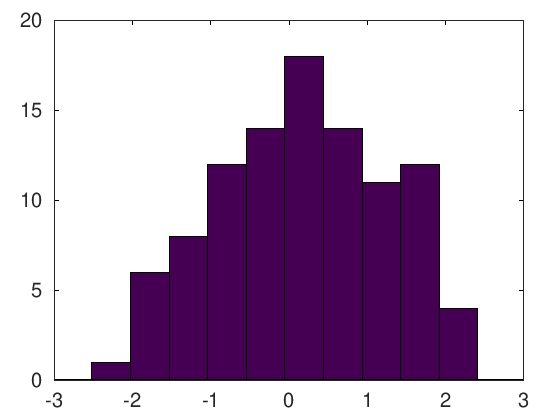

In [210]:
random_samples = normrnd(0.2,1.2,100,1);

hist(random_samples)

Instead of fitting a probability distribution to data, we instead fit the cumulative distribution function. First, let's plot the CDF of this data. 

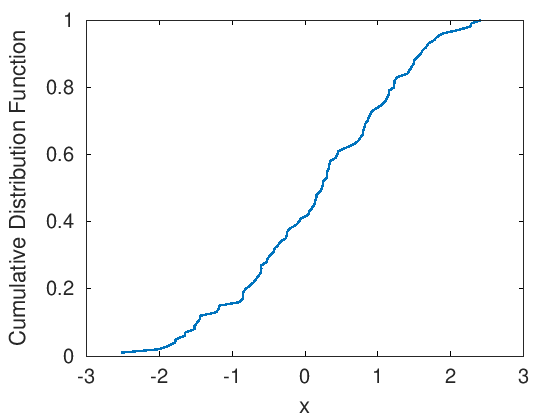

In [211]:
x = sort(random_samples);
CDF = (1:length(x))/length(x);

plot(x,CDF)
xlabel('x')
ylabel('Cumulative Distribution Function')

Notice that there is no binning error here - much better than trying to fit a histogram! Now, let's use the CDF function that we know has to hold true for a Gaussian.

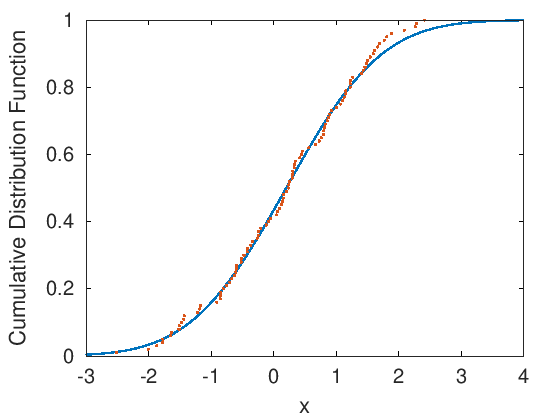

In [216]:
function cdf = GaussianCDF(x)
    mu=0.2;
    sigma=1.2;
    cdf = 1/2*(1+erf((x-mu)/sigma/sqrt(2)));
end

x_range = linspace(-3,4,100);
cdf_range = arrayfun(@GaussianCDF,x_range);
plot(x_range,cdf_range)

hold all;
plot(x,CDF,'.')
xlabel('x')
ylabel('Cumulative Distribution Function')

We can play with the fixed values of mu and sigma here to see how well we get the two to fit.

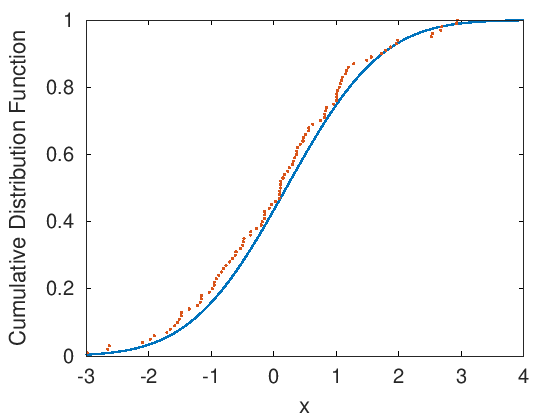

In [19]:
function cdf = GaussianCDF(x)
    mu=0.2;
    sigma=1.2;
    cdf = 1/2*(1+erf((x-mu)/sigma/sqrt(2)));
end

x_range = linspace(-3,4,100);
cdf_range = arrayfun(@GaussianCDF,x_range);
plot(x_range,cdf_range)

hold all;
plot(x,CDF,'.')
xlabel('x')
ylabel('Cumulative Distribution Function')

Note that the best fitted values of the parameters aren't accurate! We don't have a way to quantify this uncertainty, but we could do it with likelihood estimation or known estimators. 

### Analytical estimators

If you make assumptions about the probability distribution and the function you are interested in, you can derive a function that will directly estimate the parameter you are interested in. 

For a gaussian probability distribution function:
- The best estimator of the parameter $\mu$ is the average: $(\sum x_i)/N$, with variance $\sigma^2/N$
- The best estimator of the parameter $\sigma$ is
$$ s^2=\frac{n}{n+1}\sigma^2$$
where $\sigma$ is the standard deviation of the samples. The uncertainty on this estimate is 
the standard deviation, with variance given by $\sigma^4/(n-1)$

Let's try this for our gaussian distributed data

In [228]:
random_samples = normrnd(0.2,1.2,100,1);

# Actual mean: 0.2
mean(random_samples)
std_dev = sqrt(1.2^2/length(random_samples))

# Actual std: 1.2
std(random_samples*length(random_samples)/(length(random_samples)+1))
std_dev = sqrt(1.2^4/(length(random_samples)-1))


ans =  0.15906
std_dev =  0.12000
ans =  1.1145
std_dev =  0.14473


Notice that every time we sample this we get a different result, and it varies quite a bit! Let's see how this estimate varies.

mu =  0.20000
sigma =  0.084853


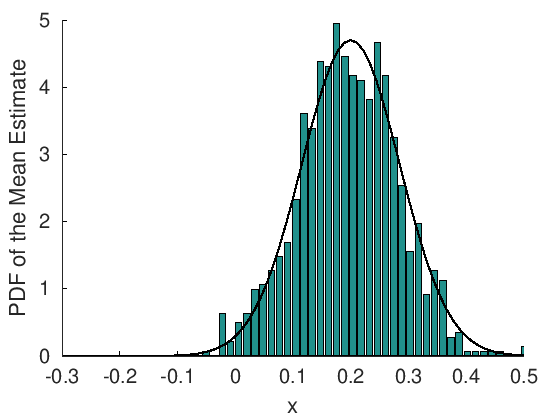

In [230]:
means=[];

for i=1:1000
    random_samples = normrnd(0.2,1.2,200,1);

    # Actual mean: 0.2
    means(end+1)=mean(random_samples);

    # Actual std: 1.2
    stds(end+1)=std(random_samples);
end

#Draw the distribution of observed means
[nn, xx] = hist(means,40);
hold all;

bar(xx,nn/sum(nn)/(xx(2)-xx(1)))


#Draw the analytical estimate for the mean estimator
x = linspace(-0.5,0.6);
mu=0.2
sigma=1.2/sqrt(length(random_samples))
f = 1/sqrt(2*pi*sigma^2)*exp(-(x-mu).^2/2/sigma^2);
plot(x,f,'k','LineWidth',4)
xlim([-0.3,0.5])
xlabel('x')
ylabel('PDF of the Mean Estimate')

# Testing that two distributions are different

We often want to know if a distribution is substatially different from another distribution. For example:
- The average and the standard deviation of the first exam was 84% and 8.8% respectively.
- The average and the standard deviation of the second exam was 66% and 17% respectively.

We want to know, assuming these exams were both drawn from normal distributions, if the distribution for the second exam was substantially different from the first or just another realization of the same statistic.

First, let's generate some synthetic data from these distributions: 

In [231]:
exam1_scores = normrnd(84,8.8,50,1);
exam2_scores = normrnd(66,17,50,1);

It always helps to plot the data

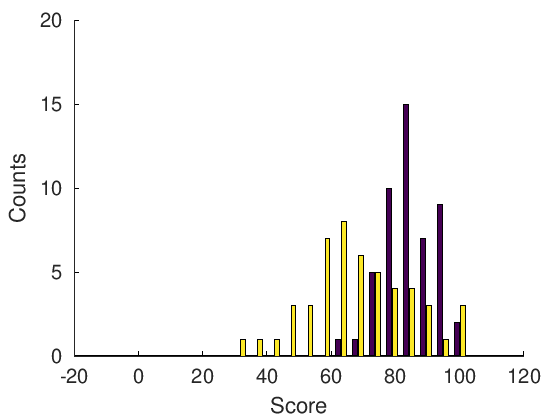

In [232]:
bins=linspace(0,100,20);
[nn,xx] = hist(exam1_scores, bins);
% bar(xx,nn)
hold all;
[nn2,xx2] = hist(exam2_scores, bins);
bar(xx,[nn;nn2]')

xlabel('Score')
ylabel('Counts')

We want to know if the average on those two tests is substantially different. So, let's use our new estimators:

mu =  85.096
sigma =  1.1782
mu =  68.862
sigma =  2.5370


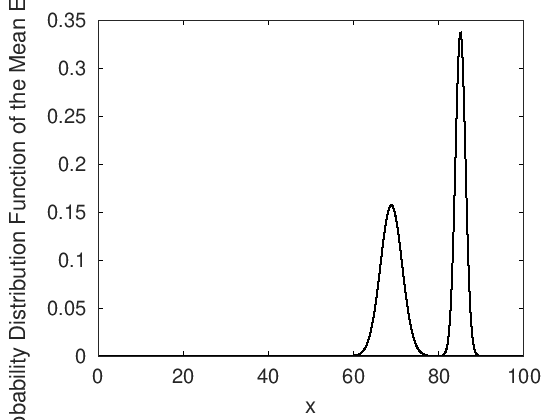

In [233]:
x = linspace(0,100,400);
mu=mean(exam1_scores)
sigma=std(exam1_scores)/sqrt(length(exam1_scores))
f = 1/sqrt(2*pi*sigma^2)*exp(-(x-mu).^2/2/sigma^2);
plot(x,f,'k','LineWidth',4)
xlim([0,100])
hold all;

x = linspace(0,100,400);
mu=mean(exam2_scores)
sigma=std(exam2_scores)/sqrt(length(exam2_scores))
f = 1/sqrt(2*pi*sigma^2)*exp(-(x-mu).^2/2/sigma^2);
plot(x,f,'k','LineWidth',4)
xlim([0,100])

xlabel('x')
ylabel('Probability Distribution Function of the Mean Estimate')

In this case, there is practically no chance that the average of these two were identical. Let's say we only had 5 samples instead though.

mu =  85.795
sigma =  3.1886
mu =  73.876
sigma =  4.7345


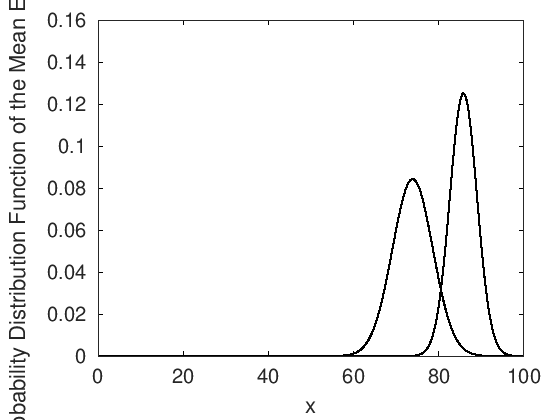

In [235]:
exam1_scores = normrnd(62.4,8.8,10,1);
exam2_scores = normrnd(66,17,10,1);

x = linspace(0,100,400);
mu=mean(exam1_scores)
sigma=std(exam1_scores)/sqrt(length(exam1_scores))
f = 1/sqrt(2*pi*sigma^2)*exp(-(x-mu).^2/2/sigma^2);
plot(x,f,'k','LineWidth',4)
xlim([0,100])
hold all;

x = linspace(0,100,400);
mu=mean(exam2_scores)
sigma=std(exam2_scores)/sqrt(length(exam2_scores))
f = 1/sqrt(2*pi*sigma^2)*exp(-(x-mu).^2/2/sigma^2);
plot(x,f,'k','LineWidth',4)
xlim([0,100])

xlabel('x')
ylabel('Probability Distribution Function of the Mean Estimate')

It is still pretty unlikely, but there is a significant chance now that exam 1 was actually just a weird set of samples from a distribution with mean 75.

We made an assumption about the underlying distributions. We could directly sample this question with:

In [237]:
test = zeros(10000,1);
for i = 1:10000
    exam1_scores = normrnd(84,8.8,10,1);
    exam2_scores = normrnd(66,17,10,1);

    test(i)=mean(exam1_scores)<mean(exam2_scores);
end

sum(test*1.0/length(test))*100

ans =  86.500


### Student t-test

This is the exact idea behind the student t-test. We will ask you to compute the student t-test for this example on the homework. 

# Summary

- There are multiple types of distributions depending on whether the problem is discrete and the underlying physics generating the samples
- Averaging lots of independent random variables (regardless of their distributions) tends to lead to Gaussian distributions
- We can plot and fit distributions of any type. Be careful of binning errors, and think about whether PDF or CDF is the more useful function
- If we have experimental data there are multiple ways we can fit the distribution:
    - We could fit the cumulative distribution function (just like any curve fitting)
    - We could look up estimators for the quantity we want for the specific distribution we're interested in
    - (harder, not covered) we could use maximum likelihood estimation to estimate the parameters
- Estimators for quantitites we're interested in, with uncertainty on those measurements, allow us to compare distributions and forms the basis of tools like the Student t-test
- Always think about the assumption you're making with various statistic tools (distributions, etc)
    - Think about whether those assumptions are appropriate or not. 
    - It is often possible to directly sample the quantities for the assumed question